In [2]:
import networkx as nx
import numpy as np

In [3]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v


def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

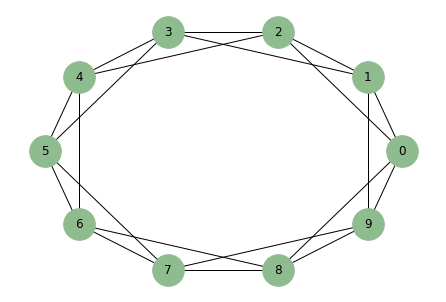

In [5]:
lattice = make_ring_lattice(10, 4)

nx.draw_circular(lattice,
                  node_size=1000,
                  node_color="darkseagreen",
                  with_labels=True)

In [7]:
def flip(p):
    return np.random.random() < p

def rewire(G, p):
    nodes = set(G)

    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

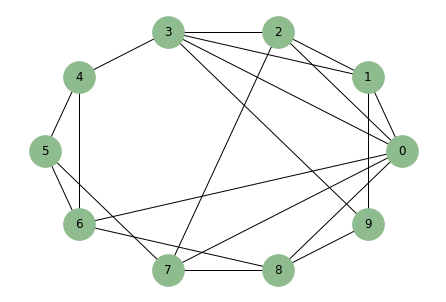

In [18]:
lattice = make_ring_lattice(10, 4)
rewire(lattice, 0.2)
nx.draw_circular(lattice,
                  node_size=1000,
                  node_color="darkseagreen",
                  with_labels=True)

In [36]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v


def node_clustering(G, u):
    neighbors = G[u]
    k = len(neighbors)
    if k < 2:
        return np.nan
    
    possible = k * (k-1)/2
    exist = 0
    for v, w in all_pairs(neighbors):
        if G.has_edge(v, w):
            exist += 1
    
    return exist/possible


def clustering_coefficient(G):
    cu = [node_clustering(G, node) for node in G]
    return np.nanmean(cu)

lattice = make_ring_lattice(10, 4)
node_clustering(lattice, 1)

0.5